# Document Recommendatio and Similarity Using LSA

The concept here is that semantic information can be extracted using LSA and recommendations can be performed with it 

In [111]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [91]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import re
from gensim import corpora
from gensim.corpora import TextCorpus, MmCorpus, Dictionary
from scipy.sparse.linalg import svds
from scipy import sparse
import scipy

In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:

source_dir = "./Hackathon-Texata-2015/SupportCommunity/RS/content/"        
from os import listdir
from os.path import isfile, join
onlyfiles = [ f for f in listdir(source_dir) if isfile(join(source_dir,f)) ]# data = []
data = []
i = 0
file_index_map = {}
for file_path in onlyfiles[0:1000]:
    with open(source_dir+file_path, "r") as myfile:
        file_text=myfile.read().replace('\n', ' ')
    file_text = re.sub(r'[^\x00-\x7F]+',' ', file_text)
    file_text = file_text.lower()
    data.append(file_text)
    file_index_map[i] = file_path
    i = i+1



In [94]:
stopset = set(stopwords.words('english'))
# stopset.update(['lt','p','/p','br','amp','quot','field','font','normal','span','0px','rgb','style','51', 
#                 'spacing','text','helvetica','size','family', 'space', 'arial', 'height', 'indent', 'letter'
#                 'line','none','sans','serif','transform','line','variant','weight','times', 'new','strong', 'video', 'title'
#                 'white','word','letter', 'roman','0pt','16','color','12','14','21', 'neue', 'apple', 'class',  ])

In [95]:
vectorizer = TfidfVectorizer(max_df = 50, min_df = 2, stop_words=stopset,
                                 use_idf=True, ngram_range=(1, 3))
X = vectorizer.fit_transform(data)

In [122]:
var=[]
for i in [10,20,50,100,200]:
    lsa = TruncatedSVD(n_components=i, n_iter=100)
    lsa.fit(X)
    var.append(sum(lsa.explained_variance_))

0.0876236378606


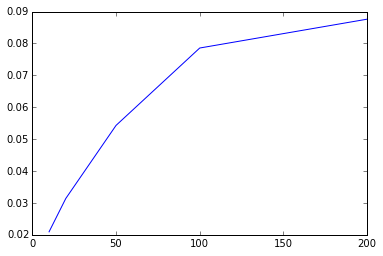

In [125]:
print sum(lsa.explained_variance_)
plot([10,20,50,100,200],var)

In [124]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
    print "Concept %d:" % i
    for term in sortedTerms:
        print term[0]
    print " "


Concept 0:
author
disclaimer
posting information
damages
reader
posting without
without consideration
contained within
advice kind
advice kind usage
 
Concept 1:
00 00
tunnel
stack
hsrp
ipv6
fa0
alain
area
nexus
asa
 
Concept 2:
00 00
drops
queue
size max
packets sec
output drops
bits sec
bits
carrier
arpa
 
Concept 3:
stack
3750x
master
stacking
nexus
4500
sup
vs
gbps
ps
 
Concept 4:
area
stack
cost
72
area 100
areas
10 192
ip ospf
master
3750x
 
Concept 5:
dscp
set dscp
stack
area
class tag
tag
policy map
af31
af21
video
 
Concept 6:
00 00
00 00 00
area
stack
laws
ip address interface
tag
set dscp
address interface
10 192
 
Concept 7:
00 00
00 00 00
dscp
class tag
pvst
set dscp
af31
peter
thu 01
af21
 
Concept 8:
pvst
peter
rapid
area
rapid pvst
legacy
72
segment
laws
root
 
Concept 9:
stack
master
new switch
peter
bpdu
mon 01
ip address interface
stack member
address interface
thu 08
 
Concept 10:
pvst
tunnel
ge tx
ge
rapid
tx
7600
address interface
rapid pvst
dot1q
 
Concept 11:
tu

In [126]:
text = "drops sec class"
y = vectorizer.transform(text)
lsa.transform(y).shape

u, s, vt = svds(X, 10, which = 'LM')

In [127]:
def find_similar_docs (document,vectorizer,X,file_index_map):
    doc = vectorizer.transform(document)
    similarity =  doc.dot(X.T)
    similarity = similarity.toarray()
    res = np.argsort(similarity[0])[::-1] # from least to most
    return [file_index_map[res[i]] for i in range(1,10)] 

find_similar_docs("Now budget dictates that i stay with this chassis at bit longer, so i need to confirm that i can VRF'ify my infrastructure with the hardware just listed if i upgrade to Sup720-3Bs. But i need to be sure i can do the following with the listed hardware (and the supervisor engine upgade ) 1. Do the newer supervisor engines fit in the old chassis and will it only require a fan module upgrade? 2. Can i for certain convert to VRF-lite with route bleeding through BGP. 3. Will i be able to go into VRF mode on the crypto engine with the newer supervisor engine? (so everyting eventually integrates) 4. Also i have some idea of which ios i should be running, one in the SXH or I release train. But what would you guys recommend? 4. And finally, will i be able to issue the ip vrf forwarding command on both virtual interfaces and physical? 5. Oh and will everything run for sure on dual 2500w psu's? Thanks in advance - any input i will appreciate! Best regards and cheers I have this problem too.",vectorizer,X,file_index_map)

['11908636_html.txt',
 '11434131_html.txt',
 '10187196_html.txt',
 '10510026_html.txt',
 '10671901_html.txt',
 '10342681_html.txt',
 '11417191_html.txt',
 '11416291_html.txt',
 '11711946_html.txt']

In [66]:
a = [1,2,3]
a[::-1]

[3, 2, 1]

In [51]:
X[0,:].shape

(1, 24400)

In [17]:
lsa.components_

array([[  3.80691478e-02,   1.57772146e-02,   2.68923352e-03, ...,
          1.83455061e-03,   1.00089606e-03,   1.03749300e-03],
       [ -5.30492286e-02,  -2.28879285e-02,  -2.52707630e-03, ...,
         -2.34896521e-03,  -1.52006239e-03,  -2.14966637e-03],
       [  2.85121174e-01,   7.98708347e-02,   1.24824974e-02, ...,
          6.67516236e-04,   8.19743882e-04,   3.58962213e-03],
       ..., 
       [  3.91666252e-02,   2.04984906e-02,  -2.73933404e-03, ...,
          3.65944826e-03,   1.43855470e-03,   5.16273282e-03],
       [  2.76944890e-03,   4.85419440e-03,   3.98534259e-03, ...,
         -2.62096955e-03,   2.56223150e-04,  -1.38549684e-03],
       [  1.30632885e-02,  -7.78024360e-03,  -4.20018052e-03, ...,
         -3.16413989e-03,  -1.97040053e-03,   1.96254114e-03]])

In [18]:
>>> import logging
>>> logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [19]:
>>> texts = [[word for word in document.split() if word not in stopset]
>>>          for document in data]
>>>
>>> # remove words that appear only once
>>> from collections import defaultdict
>>> frequency = defaultdict(int)
>>> for text in texts:
>>>     for token in text:
>>>         frequency[token] += 1
>>>
>>> texts = [[token for token in text if frequency[token] > 1]
>>>          for text in texts]
>>>
>>> from pprint import pprint   # pretty-printer


In [21]:
>>> dictionary = corpora.Dictionary(texts)
>>> dictionary.save('/tmp/deerwester.dict') # store the dictionary, for future reference
>>> print(dictionary)


Dictionary(13048 unique tokens: [u'x-over', u'x.x.x.x/30', u'factory', u'four', u'prefix']...)


In [22]:
>>> new_doc = "Human computer interaction"
>>> new_vec = dictionary.doc2bow(new_doc.lower().split())

In [23]:
>>> from gensim import corpora, models, similarities
>>> dictionary = corpora.Dictionary.load('/tmp/deerwester.dict')
>>> corpus = corpora.MmCorpus(texts) # comes from the first tutorial, "From strings to vectors"
>>> print(corpus)


AttributeError: 'list' object has no attribute 'seek'

In [ ]:
>>> from simserver import SessionServer
>>> server = SessionServer('/tmp/my_server') # resume server (or create a new one)

In [47]:
tz_sample = './tz_sample.xml'
with open(tz_sample, "r") as myfile:
    tz_text=myfile.read().replace('\n', ' ')
# tz_text = re.sub(r'[^\x00-\x7F]+',' ', tz_text)
# tz_text = tz_text.lower()

import xml.etree.cElementTree as et
foo = et.XML(tz_text)
# for e in foo:
#      print e.tag, e.text, repr(e.tail)

ParseError: junk after document element: line 1, column 9185

In [48]:
tz_text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?> <techZoneContent xmlns="cdetsng" id="100022">     <boardHref>/boards/id/uc_apps_clients_cup@tkb</boardHref>     <containsVideo>0</containsVideo>     <content> [623326813] Solution: administration play does not show the logo for &quot;Cisco Jabber for Tablet&quot;.      Symptoms    \xc2\xa0  customer cannot see the logo for Cisco Jabber for Tablet icon in CUCM 8.5.1   Cause / Problem Description  customer installed the cop file cmterm-jabbertablet-100v10-dm.cop.sgn and the device is working good but customer cannot see the logo. customer has the same setting in the lab but they can see the logo as:  \xc2\xa0     Conditions / Environment  CUCM 8.5.1.11900-21 and cop file cmterm-jabbertablet-100v10-dm.cop.sgn   Resolution  check the page source and can see:  \xc2\xa0  &lt;/select&gt;&lt;/td&gt;&lt;/tr&gt;&lt;/table&gt;&lt;/div&gt;&lt;table cellspacing=\'0\' width=\'100%\' class=\'cuesTableBg\' border=\'0\' summary=\'Find List Table 

In [28]:
Y = vectorizer.transform(tz_text[0:100])

In [ ]:
def find_top_docs(U,num_docs):
    for i in range(0,num_docs):
        

In [ ]:
u.shape

In [ ]:
s.shape

In [ ]:
s

In [ ]:
u[0,0:].dot(s)

In [ ]:
u[0,0:].shape

ParseError: junk after document element: line 109, column 0

In [40]:
tz_text[0:100]

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?>\n<techZoneContent xmlns="cdetsng" id="100022"'